In [1]:
# Notebook to look into multiple demonstrations and plot the errors of the end effector positions of the arms

In [1]:
from tactile_learning.utils import load_data

In [2]:
demo_root = '/home/irmak/Workspace/Holo-Bot/extracted_data/franka_data_first/openloop_demos/demonstration_demo_14'
# demo_data = load_data([demo_root], representations=['franka'])

In [3]:
demo_bad_root = '/home/irmak/Workspace/Holo-Bot/extracted_data/franka_data_first/openloop_demos/demonstration_smaller_step_16'
# bad_data = load_data([demo_bad_root], representations=['franka'])

In [4]:
demo_good_root = '/home/irmak/Workspace/Holo-Bot/extracted_data/franka_data_first/openloop_demos/demonstration_fixed_37'
# good_data = load_data([demo_good_root], representations=['franka'])

In [5]:
whole_data_roots = [demo_root, demo_bad_root, demo_good_root]
data = load_data(roots=whole_data_roots, demos_to_use=[14,16,37], representations=['franka'])

demo_num: 14
curr_indices lenght: 195
arm_indices [[0, 0], [0, 11], [0, 21], [0, 29], [0, 39], [0, 51], [0, 62], [0, 73], [0, 84], [0, 95], [0, 105], [0, 118], [0, 127], [0, 137], [0, 148], [0, 158], [0, 167], [0, 176], [0, 187], [0, 199], [0, 210], [0, 221], [0, 231], [0, 240], [0, 250], [0, 261], [0, 271], [0, 279], [0, 287], [0, 294], [0, 304], [0, 313], [0, 322], [0, 332], [0, 342], [0, 352], [0, 360], [0, 369], [0, 379], [0, 388], [0, 396], [0, 405], [0, 413], [0, 422], [0, 431], [0, 440], [0, 449], [0, 464], [0, 473], [0, 483], [0, 492], [0, 503], [0, 512], [0, 521], [0, 532], [0, 543], [0, 553], [0, 561], [0, 570], [0, 580], [0, 589], [0, 598], [0, 630], [0, 641], [0, 657], [0, 665], [0, 672], [0, 681], [0, 691], [0, 701], [0, 710], [0, 720], [0, 731], [0, 742], [0, 753], [0, 765], [0, 777], [0, 788], [0, 800], [0, 812], [0, 826], [0, 837], [0, 849], [0, 863], [0, 873], [0, 882], [0, 890], [0, 899], [0, 909], [0, 917], [0, 927], [0, 937], [0, 947], [0, 957], [0, 966], [0, 976], 

In [9]:
import numpy as np
demo_eef = np.zeros((208, 7))
good_eef = np.zeros((208,7))
bad_eef = np.zeros((208,7))

In [10]:
old_demo_id = 0
act_demo_count = 0 # To match the sizes of the demos
bad_demo_count = 0 
good_demo_count = 0
for i in range(len(data['arm']['indices'])):
    demo_id, data_id = data['arm']['indices'][i]

    if demo_id == 0:
        demo_eef[act_demo_count, :] = data['arm']['values'][demo_id][data_id]
        act_demo_count += 1
    if demo_id == 1:
        bad_eef[bad_demo_count, :] = data['arm']['values'][demo_id][data_id]
        bad_demo_count += 1
    if demo_id == 2:
        good_eef[good_demo_count, :] = data['arm']['values'][demo_id][data_id]
        good_demo_count += 1





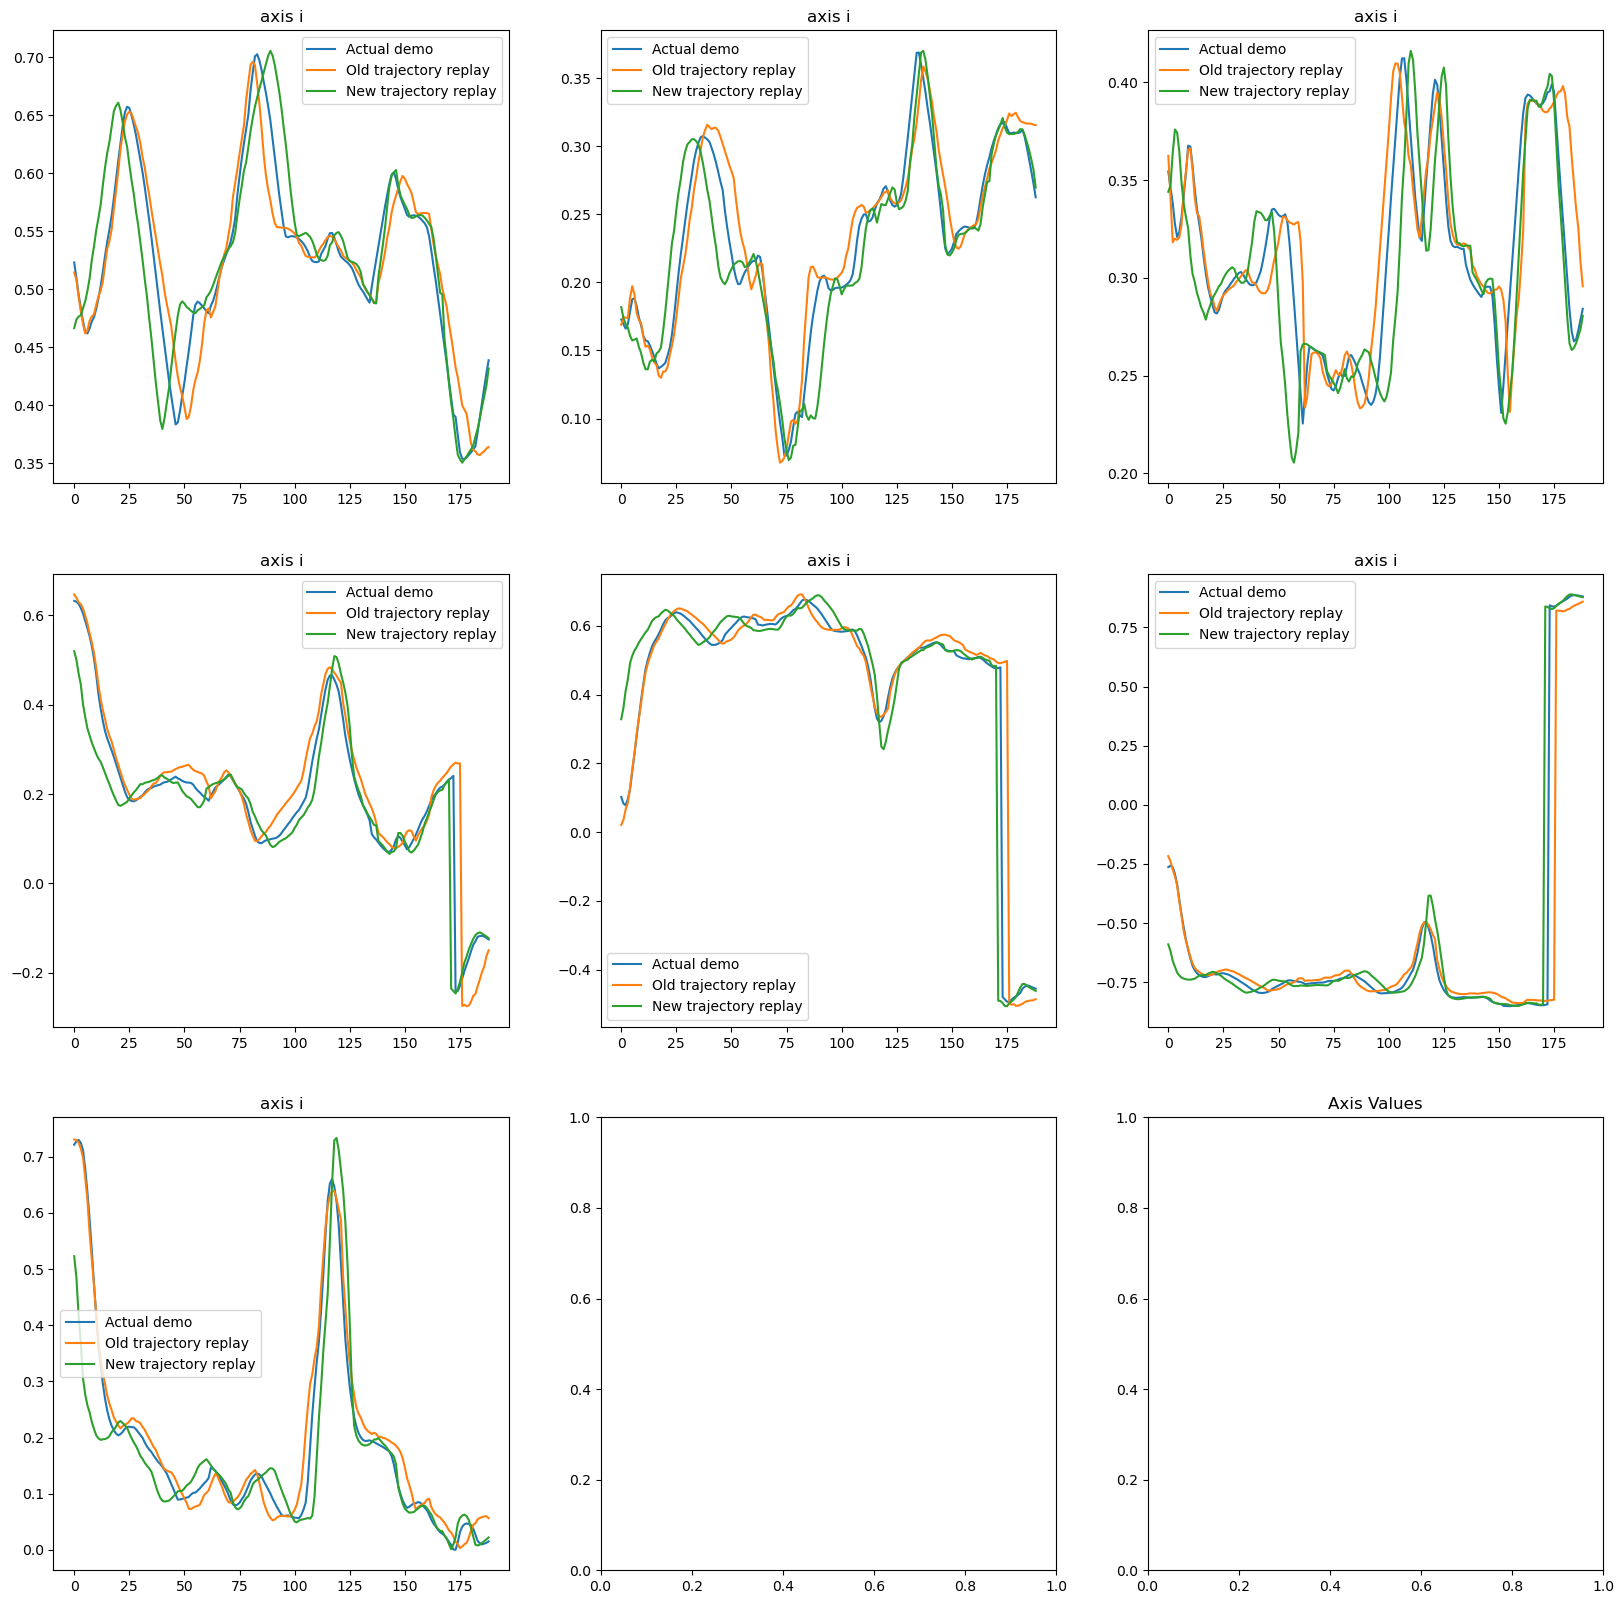

In [51]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,20))

for i in range(7):
    row = int(i/3)
    col = i%3
    axs[row, col].plot(demo_eef[:-19,i], label='Actual demo')
    axs[row, col].plot(bad_eef[:-19,i], label='Old trajectory replay')
    axs[row, col].plot(good_eef[4:-15,i], label='New trajectory replay')
    axs[row, col].set_title('axis i')
    axs[row, col].legend()
# plt.legend()
plt.title('Axis Values')
plt.show()

lenghts: (demo=(191,), new=(191,), old=(191,))
lenghts: (demo=(191,), new=(191,), old=(191,))
lenghts: (demo=(191,), new=(191,), old=(191,))
lenghts: (demo=(191,), new=(191,), old=(191,))
lenghts: (demo=(191,), new=(191,), old=(191,))
lenghts: (demo=(191,), new=(191,), old=(191,))
lenghts: (demo=(191,), new=(191,), old=(191,))


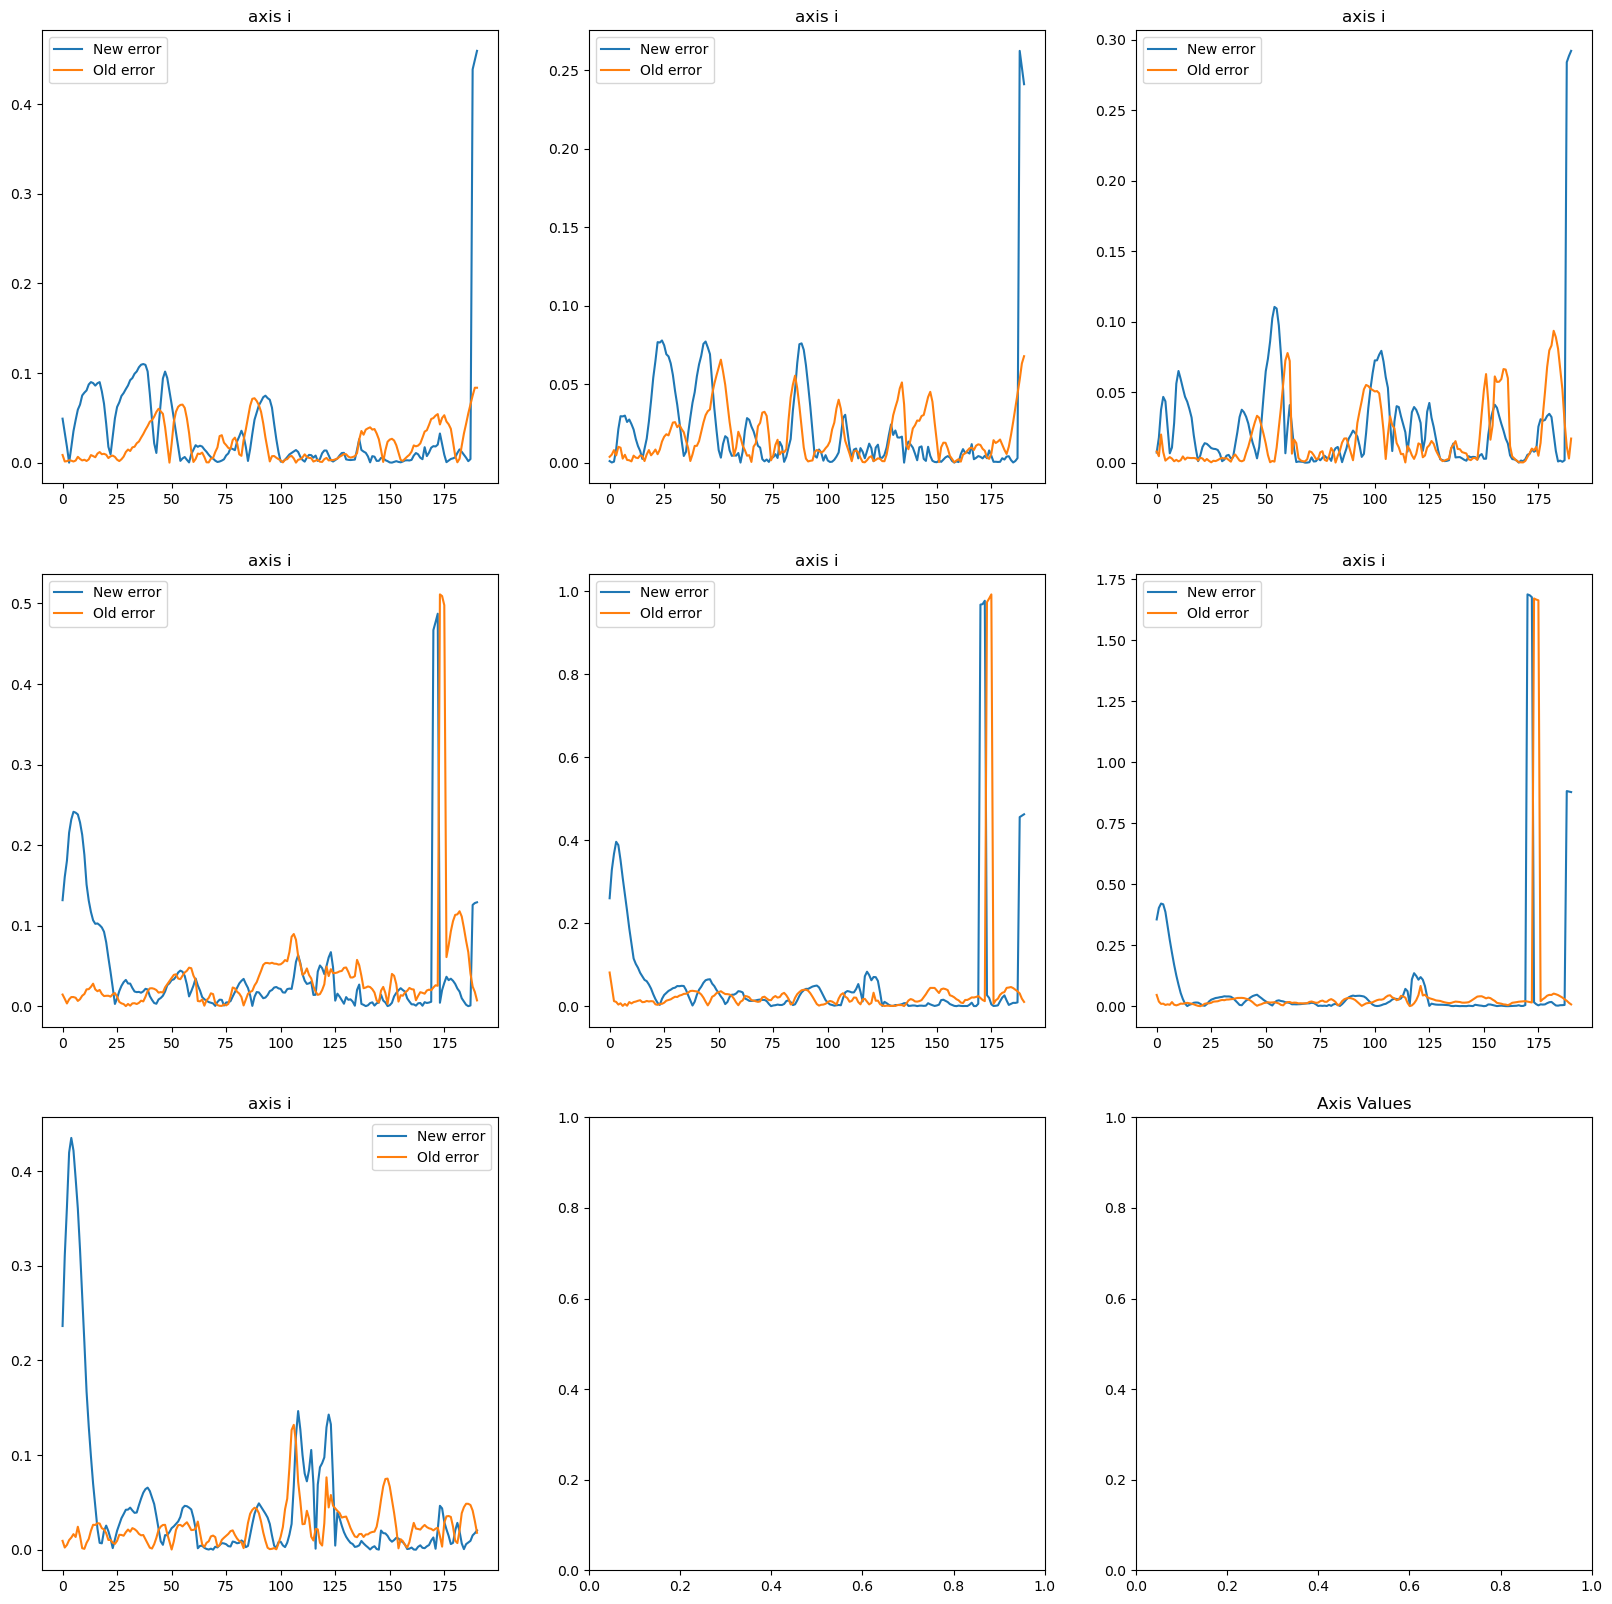

In [48]:
# Plotting the erros
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,20))

for i in range(7):
    row = int(i/3)
    col = i%3
    print('lenghts: (demo={}, new={}, old={})'.format(
        demo_eef[:-17,i].shape, good_eef[2:-15,i].shape, bad_eef[:-17,i].shape
    ))
    axs[row, col].plot(np.abs(demo_eef[:-19,i]-good_eef[4:-15,i]), label='New error')
    axs[row, col].plot(np.abs(demo_eef[:-19,i]-bad_eef[:-19,i]), label='Old error')
    # axs[row, col].plot(good_eef[2:-15,i], label='New trajectory replay')
    axs[row, col].set_title('axis i')
    axs[row, col].legend()
# plt.legend()
plt.title('Axis Values')
plt.show()